In [0]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from scipy import sparse
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [0]:
# pentru datele de training si validation luam doar coloana a doua
training_data = np.genfromtxt('train_samples.txt',comments='None', dtype='str', delimiter='\t', encoding='utf-8')[:, 1]
training_labels = np.loadtxt('train_labels.txt', dtype='int')[:, 1]

validation_data = np.genfromtxt('validation_samples.txt',comments='None', dtype='str', delimiter='\t', encoding='utf-8')[:, 1]
validation_labels = np.loadtxt('validation_labels.txt', dtype='int')[:, 1]

test_data = np.genfromtxt('test_samples.txt',comments='None', dtype='str', delimiter='\t', encoding='utf-8')


In [0]:
transformer = TfidfVectorizer(ngram_range=(6, 6), analyzer='char_wb', lowercase=False, norm='l2')

# keras accepta doar matrici dense nu sparse
training_features = transformer.fit_transform(training_data)
training_features = sparse.csr_matrix.todense(training_features)

validation_features = transformer.transform(validation_data)
validation_features = sparse.csr_matrix.todense(validation_features)


In [0]:
model = Sequential()

activation = 'sigmoid'

model.add(layers.Dense(units=4, input_dim=(training_features.shape[1])))
model.add(layers.Activation(activation))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(units=8))
model.add(layers.Activation(activation))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(units=4))
model.add(layers.Activation(activation))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(units=1))
model.add(layers.Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(training_features, training_labels,
                    epochs=100, batch_size=100,
                    validation_data=(validation_features, validation_labels))

Epoch 1/100
78/78 [==============================] - 2s 28ms/step - loss: 0.7655 - accuracy: 0.4944 - val_loss: 0.7313 - val_accuracy: 0.4898
Epoch 2/100
78/78 [==============================] - 2s 25ms/step - loss: 0.7278 - accuracy: 0.4963 - val_loss: 0.7080 - val_accuracy: 0.4898
Epoch 3/100
78/78 [==============================] - 2s 25ms/step - loss: 0.7109 - accuracy: 0.4943 - val_loss: 0.6985 - val_accuracy: 0.4898
Epoch 4/100
78/78 [==============================] - 2s 25ms/step - loss: 0.7007 - accuracy: 0.5032 - val_loss: 0.6949 - val_accuracy: 0.4898
Epoch 5/100
78/78 [==============================] - 2s 25ms/step - loss: 0.6977 - accuracy: 0.4961 - val_loss: 0.6936 - val_accuracy: 0.4898
Epoch 6/100
78/78 [==============================] - 2s 26ms/step - loss: 0.6954 - accuracy: 0.5035 - val_loss: 0.6931 - val_accuracy: 0.5102
Epoch 7/100
78/78 [==============================] - 2s 26ms/step - loss: 0.6955 - accuracy: 0.4998 - val_loss: 0.6929 - val_accuracy: 0.5102
Epoch 

In [0]:
predictions_validation = model.predict_classes(validation_features)

print(metrics.classification_report(validation_labels, predictions_validation))

print(metrics.confusion_matrix(validation_labels, predictions_validation))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.76      0.61      0.68      1301
           1       0.69      0.82      0.75      1355

    accuracy                           0.72      2656
   macro avg       0.73      0.72      0.71      2656
weighted avg       0.73      0.72      0.72      2656

[[ 800  501]
 [ 247 1108]]


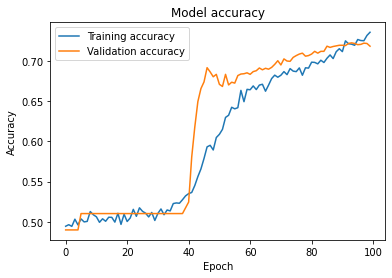

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')
plt.show()

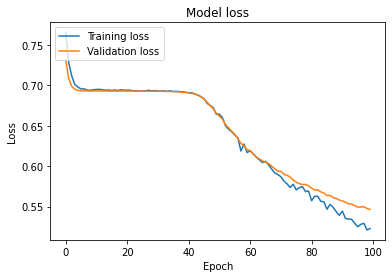

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training loss', 'Validation loss'], loc='upper left')
plt.show()


In [0]:
test_features = transformer.transform(test_data[:, 1])
test_features = sparse.csr_matrix.todense(test_features)

predictions = model.predict_classes(test_features)

In [0]:
data = {'id':test_data[:, 0], 'label':predictions.flatten()}

df = pd.DataFrame(data)

print(df)

          id  label
0     110499      0
1     101319      0
2     108883      0
3     100925      0
4     110852      1
...      ...    ...
2618  104308      0
2619  103429      1
2620  103098      1
2621  107046      1
2622  108263      0

[2623 rows x 2 columns]


In [0]:
df.to_csv('predictii.csv', index=False)